#### Plot Data

In [12]:
# Must be the same with directory name
FEATURE = "cpu_usage"
MODEL = "rnn"
VERSION = "final"

START_INDEX = 2000
END_INDEX = 2500

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

def plot_predictions_and_calculate_rmse(csv_file_path, title):
    # Read the CSV file
    data = pd.read_csv(csv_file_path)

    # Filter the data
    if START_INDEX >= 0 and END_INDEX >= 0:
        end_index = min(END_INDEX, len(data))
        data = data[START_INDEX:end_index]
    
    # Convert the 'Time' column to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(data['Time']):
        data['Time'] = pd.to_datetime(data['Time'])

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(data['Time'], data['Raw'], label='Raw', color='green')
    plt.plot(data['Time'], data['Actual'], label='Filtered', color='blue')
    plt.plot(data['Time'], data['RNN'], label='Predicted (RNN)', color='red')
  
    # Labeling the Plot
    plt.title(f'[{title} Version] Actual vs Predicted vs Raw Values')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    
    # Show plot
    plt.show()

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(data['Raw'], data['RNN']))
    print(f"[{title} Version] RMSE between RNN and Raw: {rmse}")

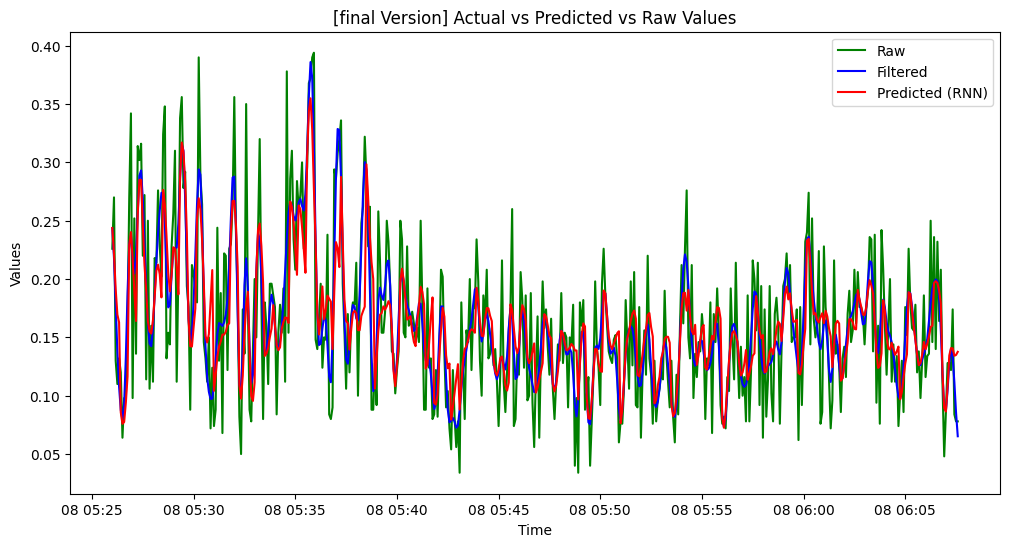

[final Version] RMSE between RNN and Raw: 0.04692383617662411


In [13]:
# Use the function
PATH = f"./{FEATURE}/{MODEL}/source/{MODEL}_{VERSION}_result.csv"
plot_predictions_and_calculate_rmse(PATH, VERSION)